In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

t_data = np.loadtxt('timedata.dat')
x_data = np.loadtxt('data.dat')


(4, 500000)
0.1245920657563568 0.051690711882656365 0.12118305324258966
0.00906363162057391 0.0009601354311015893 0.008901004106993585
0.14169688135206934 0.034913972993779054 0.16189285831442118
0.0011648378540136336 0.000350681494508531 0.0010562798474777796


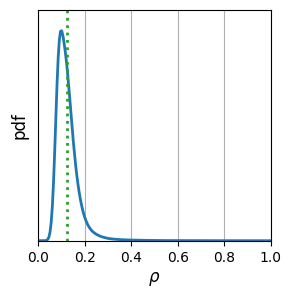

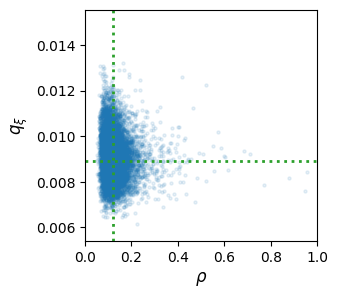

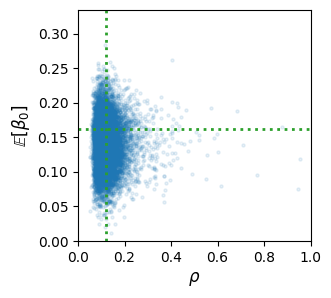

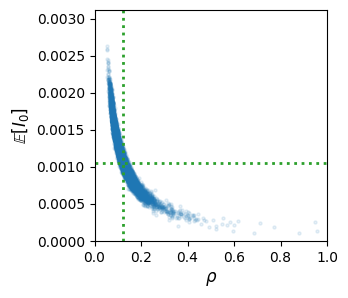

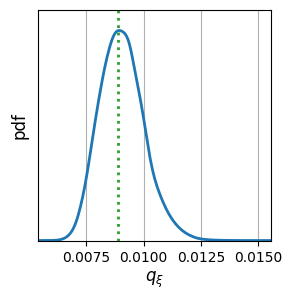

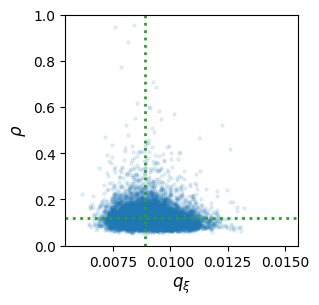

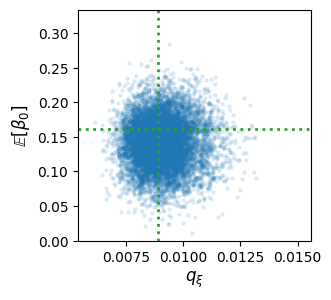

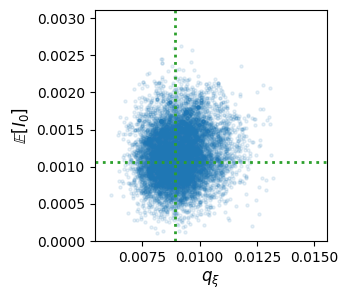

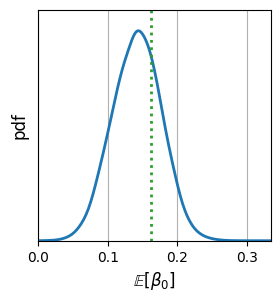

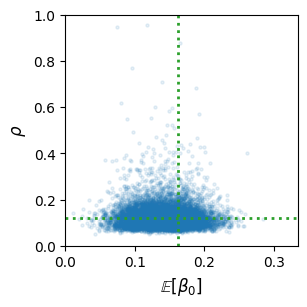

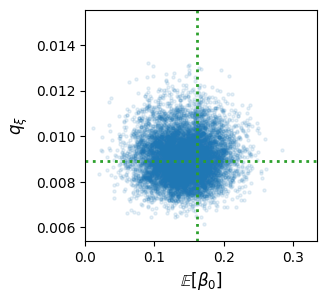

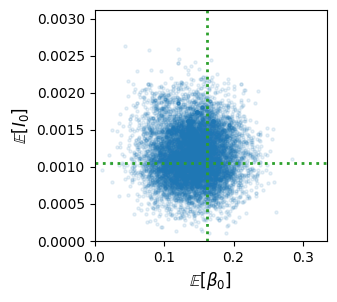

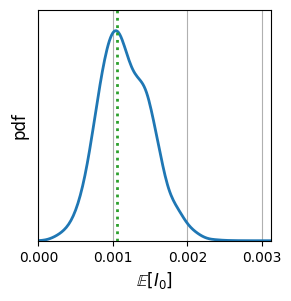

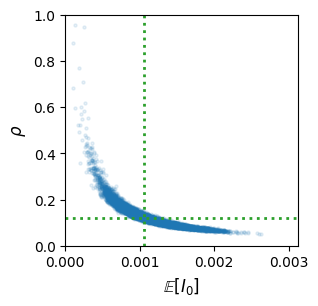

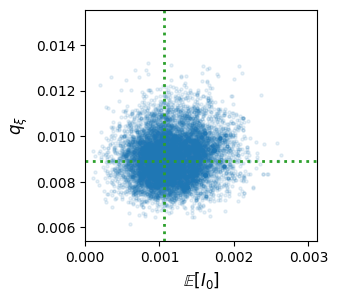

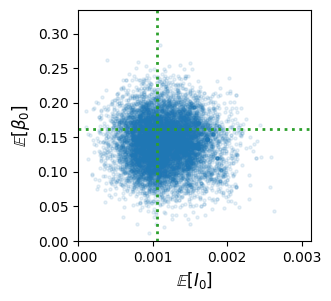

In [2]:
## Model 4
skip = 50

samples = np.loadtxt('chains/Model4-posterior.dat')
print(samples.shape)
# priors = np.loadtxt('chains/Model4-prior.dat')
maps = np.loadtxt('chains/Model4-map.dat')
label_2 = [r'$\rho$',r'$q_\xi$',r'$\mathbb{E}[\beta_0]$','$\mathbb{E}[I_0]$']
true = [0.25,0.005,0.12,0.001]
Npar = len(samples[:,0])

# from scipy.optimize import minimize
# kde = st.gaussian_kde(samples)
# def kde_fun(x):
#   return -kde(x)
# res = minimize(kde_fun,[0.15,0.008,0.1,0.0001], method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
# # print(res.x)
# maps = res.x
# np.savetxt('chains/Model4-map.dat',maps)

for ii in range(len(samples[:,0])):
  xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])
  # if param_true[ii] < xmin:
  #   xmin = param_true[ii]
  # elif  param_true[ii] > xmax:
  #   xmax = param_true[ii]

  print(np.mean(samples[ii,:]),np.std(samples[ii,:]),maps[ii])

  xmean = (xmin + xmax)/2
  xrang = (xmax - xmin)
  x_low = np.max([xmean-0.55*xrang,0])
  x_up = np.min([xmean+0.55*xrang,1])

  f, ax = plt.subplots(1, figsize=(3,3))
  Xpdf = st.gaussian_kde(samples[ii,:],bw_method = 0.2)
  # print(Xpdf.silverman_factor())
  # Xgrd = np.linspace(np.min(samples[ii,:]),np.max(samples[ii,:]))
  Xgrd = np.linspace(x_low,x_up,201)
  pdfmax = max(Xpdf(Xgrd))
  plt.plot(Xgrd,Xpdf(Xgrd),color='tab:blue',linewidth=2)
  # plt.hist(samples[ii,:],bins=50,density=True,alpha=0.25)
  # plt.plot([true[ii],true[ii]],[0,1.1*pdfmax],c='tab:red',linewidth=2,linestyle='--')
  plt.plot([maps[ii],maps[ii]],[0,1.1*pdfmax],c='tab:green',linewidth=2,linestyle=':')
  # plt.hist(samples[ii,:], bins=50, density=True,alpha=0.5)
  # plt.hist(samples[ii,::skip],density=True,bins=50,alpha=0.5)
  # plt.hist(priors[ii,:],density=True,bins=50,alpha=0.5)
  myYlim = [0.0, 1.1*pdfmax]
  plt.ylabel('pdf', fontsize=12)
  plt.xlabel(label_2[ii], fontsize=12)
  plt.ylim(myYlim)
  plt.xlim([x_low,x_up])
  plt.yticks([])
  plt.grid(True)
  plt.savefig('figures/m4_mpdf_'+ str(ii)+'.pdf',bbox_inches='tight')
  # plt.close()

  for jj in range(Npar):
   if ii != jj:
      ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
      ymean = (ymin + ymax)/2
      yrang = (ymax - ymin)
      y_low = np.max([ymean-0.55*yrang,0])
      y_up = np.min([ymean+0.55*yrang,1])

      f, ax = plt.subplots(1, figsize=(3,3))
      plt.scatter(samples[ii,::skip],samples[jj,::skip],alpha=0.1,s=5)
      plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
      plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
      # plt.plot([x_low,x_up],[true[jj],true[jj]],c='tab:red',linewidth=2,linestyle='--')
      # plt.plot([true[ii],true[ii]],[y_low,y_up],c='tab:red',linewidth=2,linestyle='--')
      plt.xlim([x_low,x_up])
      plt.ylim([y_low,y_up])
      plt.xlabel(label_2[ii],fontsize=12)
      plt.ylabel(label_2[jj],fontsize=12)
      plt.savefig('figures/m4_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
      # plt.close()

In [43]:
# for ii in range(len(samples[:,0])):
#   xmin,xmax = np.min(samples[ii,:]), np.max(samples[ii,:])

#   xmean = (xmin + xmax)/2
#   xrang = (xmax - xmin)
#   x_low = xmean-0.55*xrang
#   x_up = xmean+0.55*xrang

#   for jj in range(Npar):
#    if ii != jj:
#       ymin,ymax = np.min(samples[jj,:]), np.max(samples[jj,:])
#       ymean = (ymin + ymax)/2
#       yrang = (ymax - ymin)
#       y_low = np.max([ymean-0.55*yrang,0])
#       y_up = ymean+0.55*yrang

#       fig = plt.figure(Npar*ii+jj,figsize=(3.5, 2.8))
#       x = samples[ii,::50]
#       y = samples[jj,::50]
#       xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
#       positions = np.vstack([xx.ravel(), yy.ravel()])
#       values = np.vstack([x, y])
#       kernel = st.gaussian_kde(values,bw_method = 0.2)
#       f = np.reshape(kernel(positions).T, xx.shape)
#       ax = fig.gca()
#       # Contourf plot
#       cfset = ax.contourf(xx, yy, f, 15,cmap='Blues')
#       plt.plot([x_low,x_up],[maps[jj],maps[jj]],c='tab:green',linewidth=2,linestyle=':')
#       plt.plot([maps[ii],maps[ii]],[y_low,y_up],c='tab:green',linewidth=2,linestyle=':')
#       plt.xlim([x_low,x_up])
#       plt.ylim([y_low,y_up])
#       plt.xlabel(label_2[ii],fontsize=12)
#       plt.ylabel(label_2[jj],fontsize=12)
#     #   plt.savefig('figures/m4_jpdf_'+ str(ii)+str(jj)+'.pdf',bbox_inches='tight')
#       # plt.close()